## Satellite Image Data Analysis using numpy##

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>Data Source: Satellite Image from NASA</p>

In this example analyzes a sample satellite image dataset from NASA using the numpy library.


<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">Loading the libraries we need: numpy, imageio, matplotlib</p>

In [1]:
%matplotlib inline
import numpy as np
import imageio
import matplotlib.pyplot as plt

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">Creating a numpy array from an image file:</p> 

<br>
Lets choose a WIFIRE satellite image file as an ndarray and display its type.


In [2]:
from skimage import data

photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')
type(photo_data)

imageio.core.util.Array

Let's see what is in this image. 

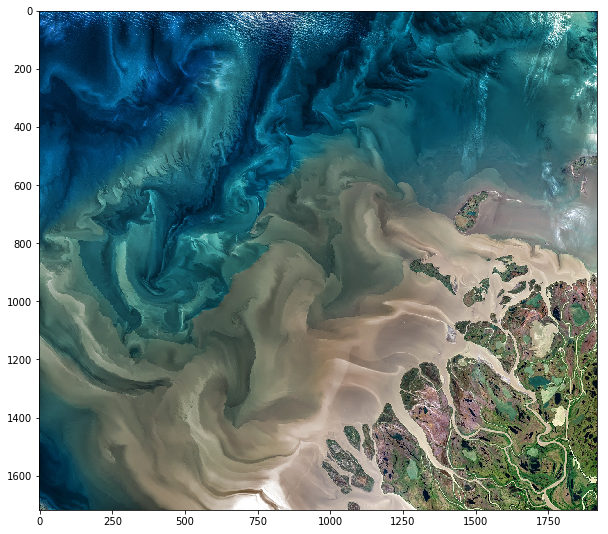

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [4]:
photo_data.shape

#print(photo_data)

(1718, 1920, 3)

The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">
RGB Color Mapping in the Photo:</p>
<ul>
<li><p style="font-family: Arial; font-size:1.0em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.0em;color:green; font-style:bold">
GREEN pixel indicates Slope</p>
<li><p style="font-family: Arial; font-size:1.0em;color:blue; font-style:bold">
BLUE pixel indicates Aspect</p>
</ul>
The higher values denote higher altitude, aspect and slope.


In [5]:
photo_data.size

9895680

In [6]:
photo_data.min(), photo_data.max()

(0, 255)

In [7]:
photo_data.mean()

95.52195281173199

Pixel on the 1000th Row and 1200th Column

In [8]:
photo_data[1000, 1200]

Array([160, 145, 126], dtype=uint8)

In [9]:
photo_data[1000, 1200, 1]

145

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">
Set a Pixel to All Zeros</p>
<br/>
We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

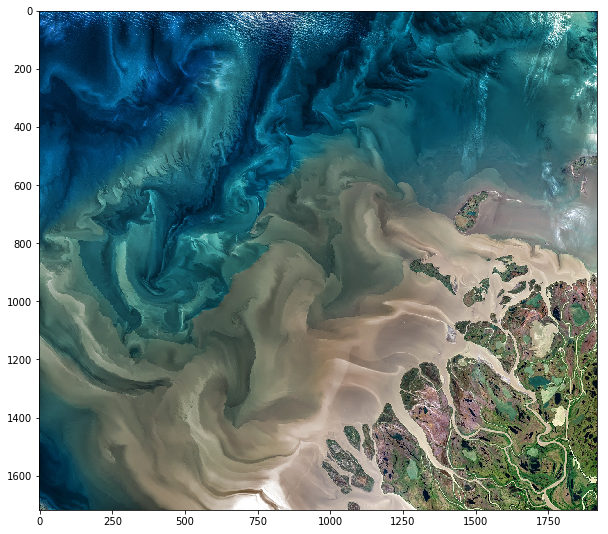

In [10]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

photo_data[150, 250] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

At (150, 250) location of the photo_data, we changed pixels value of all layers to zero (0). Since, this is at only one pixel so it is not visible in the image above.

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">Changing colors in a Range<p/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

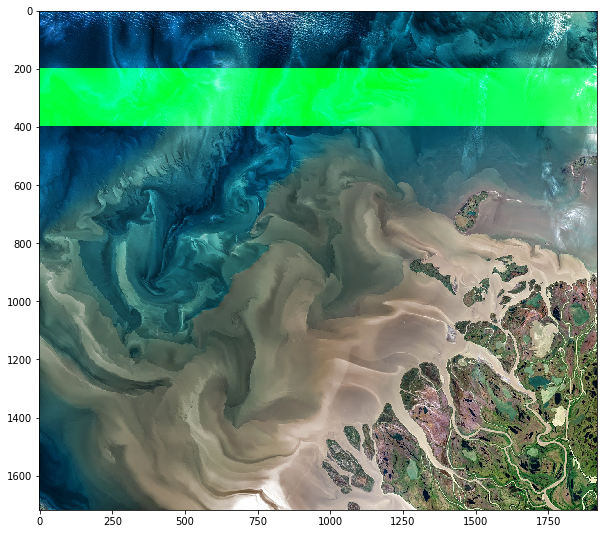

In [11]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

photo_data[200:400, : ,1] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

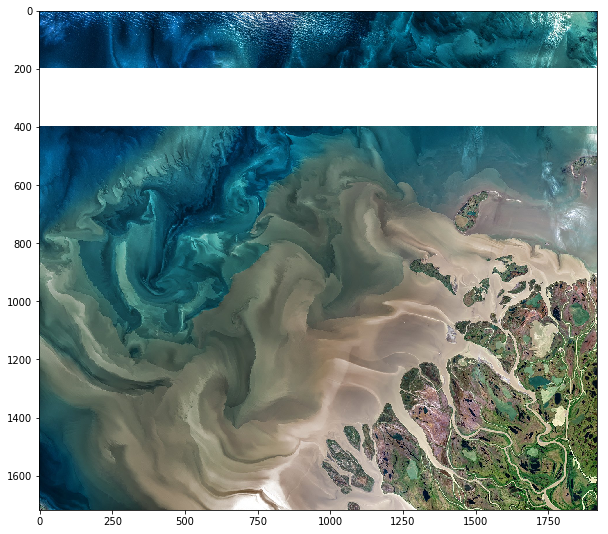

In [12]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

photo_data[200:400, :] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

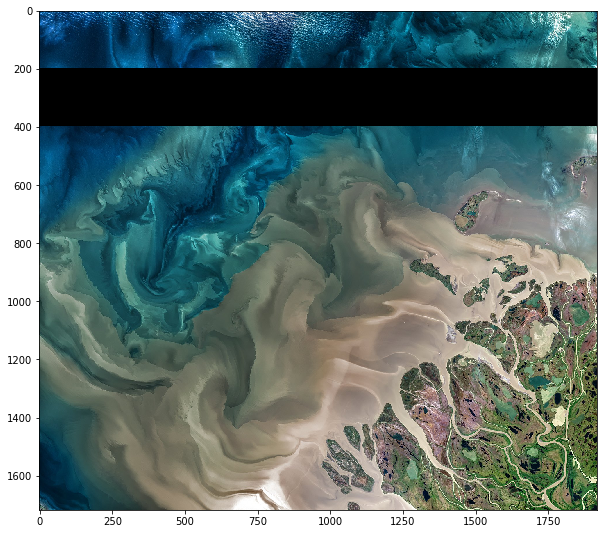

In [13]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

photo_data[200:400, :] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [14]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 150
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (1718, 1920, 3)
Shape of low_value_filter: (1718, 1920, 3)


<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

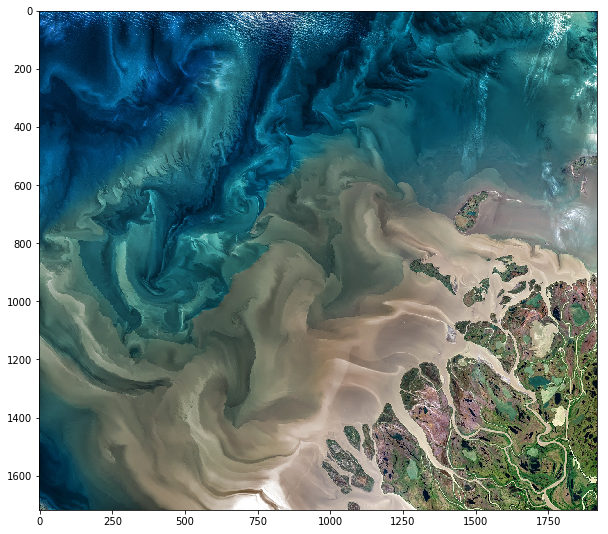

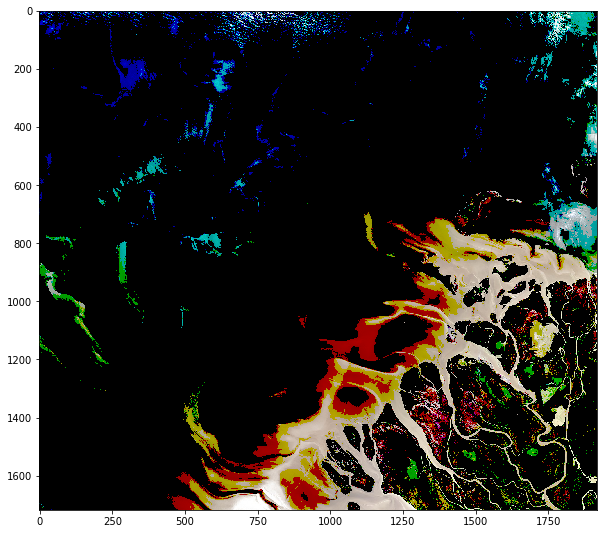

In [15]:
#import random
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [16]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [17]:
photo_data[rows_range, cols_range] = 255

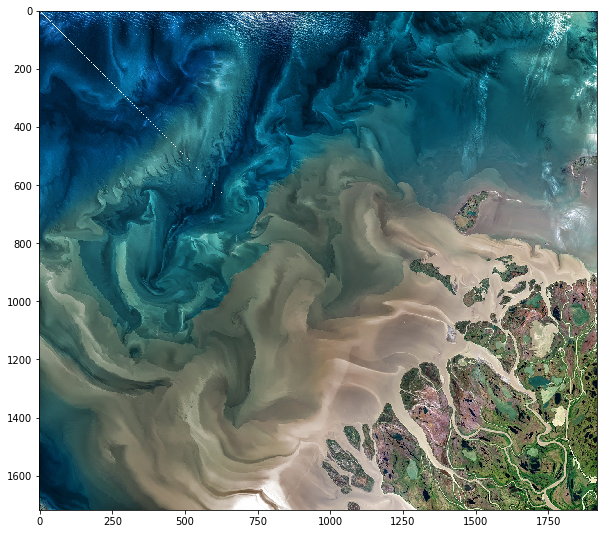

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Masking Images</p>
<br>Now let us try a mask that is in shape of a circular disc.

In [19]:
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data = ", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

photo_data =  (1718, 1920, 3)
X =  (1718, 1)  and Y =  (1, 1920)


In [20]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "and center_col = ", center_col)
#print(X - center_row)
#print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
#print(dist_from_center)
radius = (total_rows / 2)**2
#print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
#print(circular_mask)
#print(circular_mask[1500:1700,2000:2200])

center_row =  859.0 and center_col =  960.0


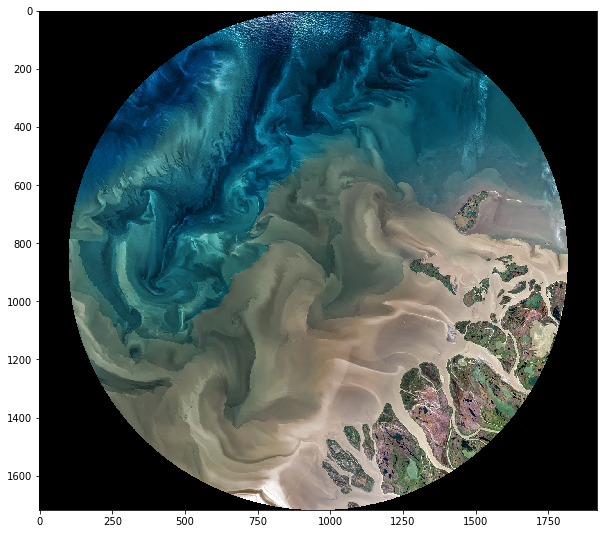

In [21]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

photo_data[circular_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">
Further Masking</p>
<br/>You can further improve the mask, for example just get upper half disc.

In [22]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above the center

half_upper_mask = np.logical_and(half_upper, circular_mask)

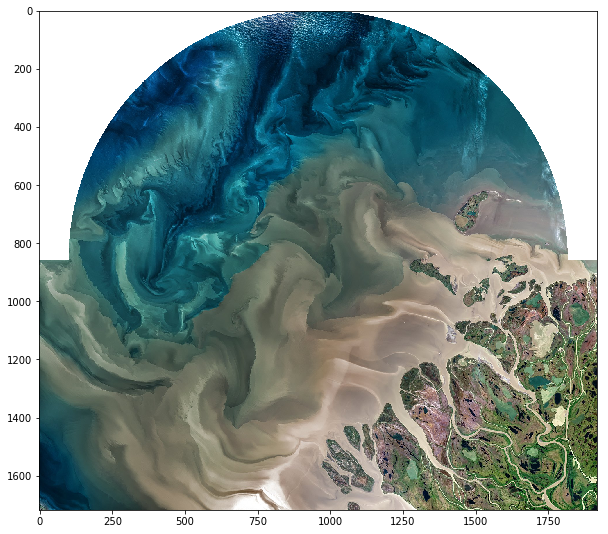

In [23]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

photo_data[half_upper_mask] = 255
#photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

### Further Processing of our Satellite Imagery ###

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">
Processing of RED Pixels</p>

Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

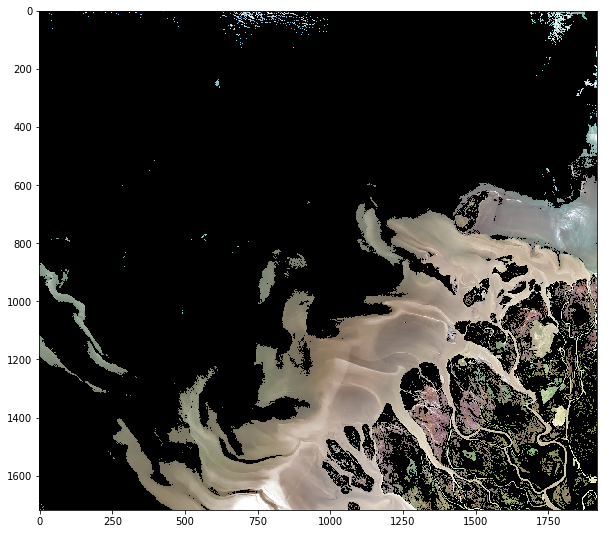

In [24]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')
red_mask   = photo_data[:, : ,0] < 120

photo_data[red_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Detecting Highly-GREEN Pixels</p>

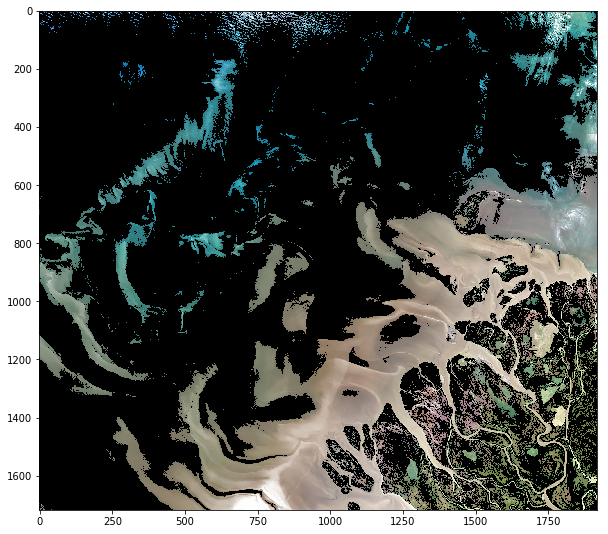

In [25]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')
green_mask = photo_data[:, : ,1] < 120

photo_data[green_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>
Detecting Highly-BLUE Pixels</p>

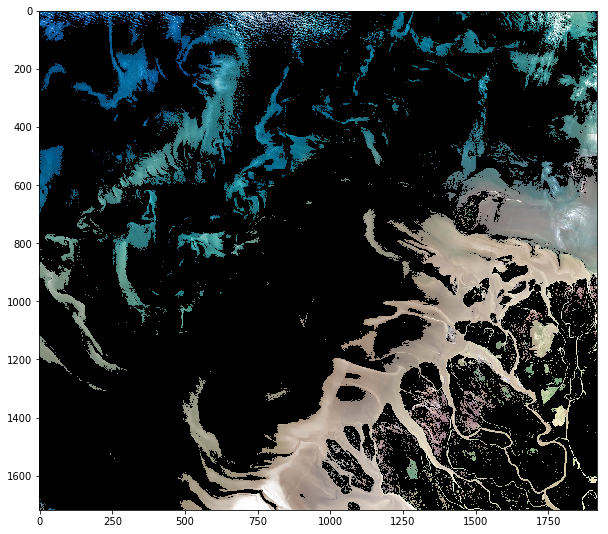

In [26]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')
blue_mask  = photo_data[:, : ,2] < 120

photo_data[blue_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE

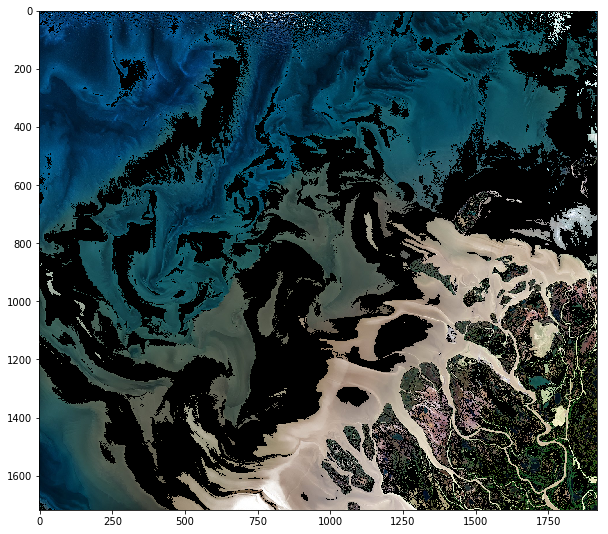

In [27]:
photo_data = imageio.imread('./MLData/sat_image_nasa.jpg')

red_mask   = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] > 100
blue_mask  = photo_data[:, : ,2] < 100

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)